# Machine Learning in Healthcare and Biomedicine
Module code: CHMEGH96

Candidate No.: TBBV7

Dataset: Heart Disease Dataset (Cleveland) 

Data source:
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

In [1]:
#basic prepartories
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




# Dataset



In [2]:
#Cleveland dataset importation
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
labels = ['age','sex','cp','trestbp','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal', 'class_label']
heart = pd.read_csv(url, header=None, names=labels, index_col=False)
heart.head()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class_label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
heart.dtypes

age            float64
sex            float64
cp             float64
trestbp        float64
chol           float64
fbs            float64
restecg        float64
thalach        float64
exang          float64
oldpeak        float64
slope          float64
ca              object
thal            object
class_label      int64
dtype: object

In [4]:
#group class_label values >= 1 into value = 1 
heart['class_label'] = heart['class_label'].replace([ 2, 3, 4], 1)

In [5]:
#convert ca and thal from str to numeric for statistical analysis 
heart['ca'] = pd.to_numeric(heart['ca'], errors='coerce')
heart['thal'] = pd.to_numeric(heart['thal'], errors='coerce')

# Introduction

In [6]:
#split df into class label and features
X = np.array(heart.iloc[:,0:13].values) # features 
y = np.array(heart.iloc[:,13].values) # class label
y.astype(int)


array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1,

# Descriptive statistics

In [246]:
#count classes
heart['class_label'].value_counts() 

0    164
1    139
Name: class_label, dtype: int64

In [182]:
#descriptives of class_label 
np.mean(y), np.std(y), np.median(y), np.percentile(y,[25,75]) # slightly skewed

(0.45874587458745875, 0.49829519076190809, 0.0, array([ 0.,  1.]))

In [287]:
#descriptives of features
heart.describe()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class_label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [25]:
#difference between mean and median may identify skew
heart.median()

#potential skew in thalach ,old peak 

age             56.0
sex              1.0
cp               3.0
trestbp        130.0
chol           241.0
fbs              0.0
restecg          1.0
thalach        153.0
exang            0.0
oldpeak          0.8
slope            2.0
class_label      0.0
dtype: float64

# Visualising the feature space 

C:\Users\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


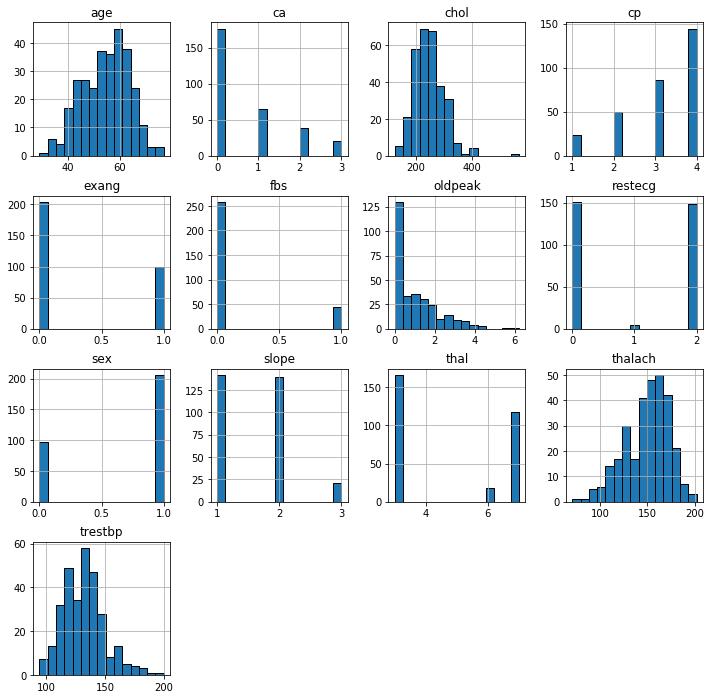

In [295]:
#ploting histograms for each feature
fig, axes = plt.subplots(len(heart.columns)//4, 3, figsize=(12,12 ))

for triaxis in axes:
    for axis in triaxis:
        heart.hist(column = heart.columns[0:13], bins = 15, ax=axis, edgecolor= 'k')


# Correlation Matrix 

Text(0.5,1,'Correlation Matrix for Cleveland Heart Disease dataset')

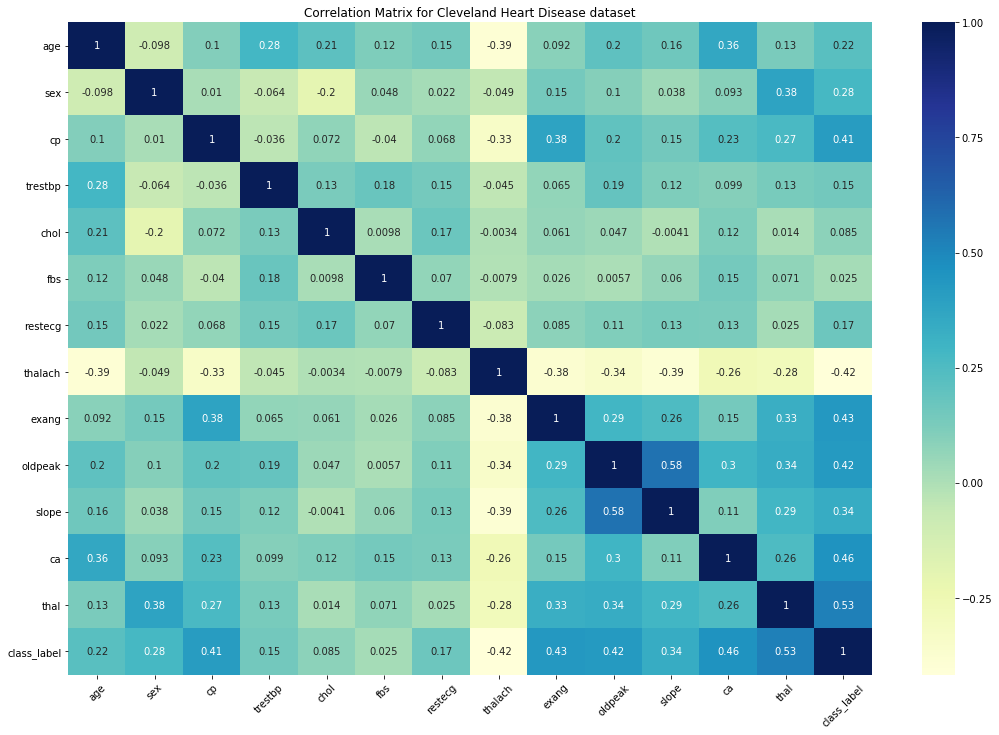

In [108]:


#thalach appears to have negative correlation with certain variables 
#thalach appears most correlated with  agecp, thalach, exang, oldpeak
#slope and 

import seaborn as sns

corr = heart.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(20,20)
plt.title('Correlation Matrix for Cleveland Heart Disease dataset')


# 3D plot of ca thal and exchang on class label

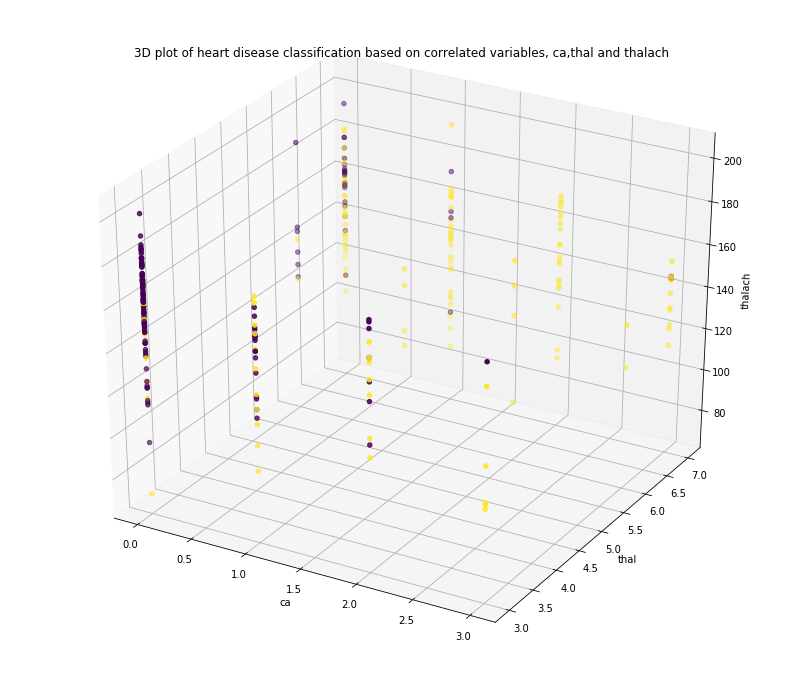

In [13]:
from mpl_toolkits.mplot3d import Axes3D

#features 
ca = heart['ca']
thal = heart['thal']
thalach = heart['thalach']



#3D plot 
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ca, thal, thalach, c=y)
ax.set_xlabel('ca')
ax.set_ylabel('thal')
ax.set_zlabel('thalach')
plt.title('3D plot of heart disease classification based on correlated variables, ca,thal and thalach')
plt.show()



In [194]:
#split features and class labels in pandas 
yheart = heart['class_label'] #class label
Xheart = heart.iloc[:,0:13] #features

# Methodology 

# Data cleansing  - missing data

missing data in categorical variables therefore must be careful with choice of imputation

In [6]:
#change missing indicatior to NaN
heart.replace('?', np.nan)

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class_label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [7]:
#identify features with NaNs ##as above see which columns have missing values 
heart.isnull().sum()

age            0
sex            0
cp             0
trestbp        0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             4
thal           2
class_label    0
dtype: int64

In [8]:
#imputation 
from sklearn.preprocessing import Imputer

#attribute processing for imputation
heart.values

#imputation using mode as missing values are in categorical variables 
imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imr = imr.fit(heart)
imputed_data = imr.transform(heart.values)

#turn back into dataframe 
heart_imp = pd.DataFrame(imputed_data)
heart_imp.columns = heart.columns
heart_imp.index = heart.index


In [9]:
#check imputed dataset for missing values
heart_imp.isnull().sum()

age            0
sex            0
cp             0
trestbp        0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
class_label    0
dtype: int64

# Data cleansing - Outliers 

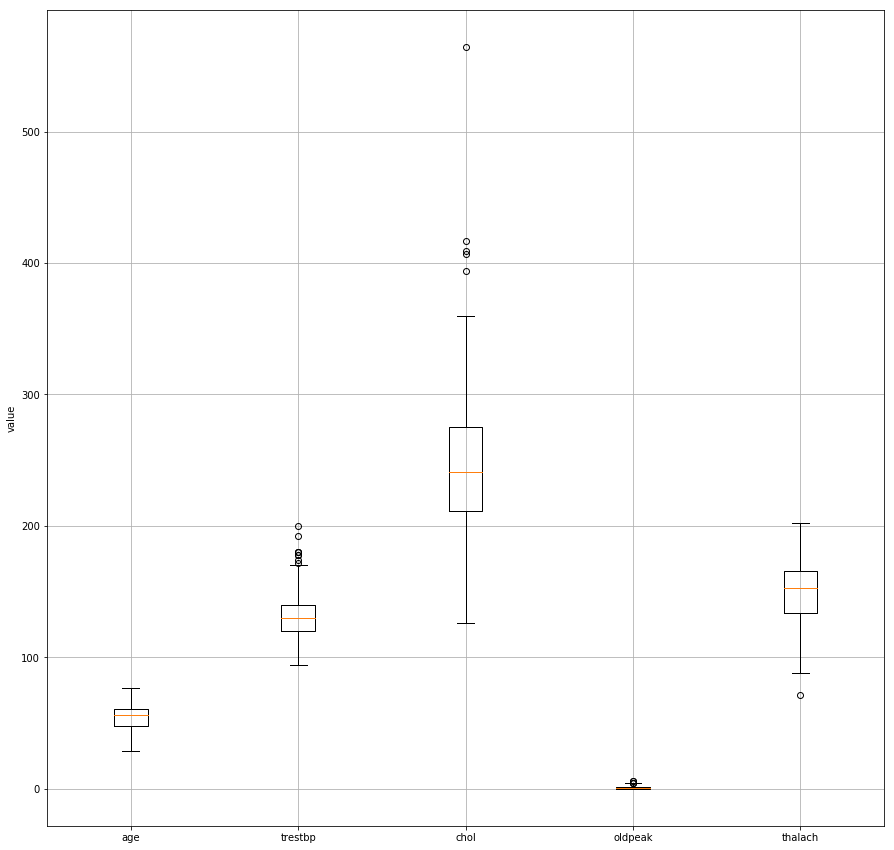

In [25]:
#exploring outliers through boxplots 
plt.figure(figsize=(15,15))
plt.boxplot([heart_imp['age'],heart_imp['trestbp'],heart_imp['chol'],heart_imp['oldpeak'],heart_imp['thalach']],positions=(0,1,2,3,4),
            widths = 0.2, showfliers=True)
plt.grid()
plt.xticks([0,1,2,3,4],['age','trestbp','chol','oldpeak','thalach'])
plt.ylabel('value')


plt.show()



In [18]:
# potential outlier for cholestrol 
heart_imp.loc[heart_imp['chol'].idxmax()]

age             67.0
sex              0.0
cp               2.0
trestbp        115.0
chol           564.0
fbs              0.0
restecg          2.0
thalach        160.0
exang            0.0
oldpeak          1.6
slope            1.0
ca               0.0
thal             2.0
class_label      0.0
Name: 152, dtype: float64


Categorical features recorded as floats will be recoded as integers and rescaled 0 - n.  

In [11]:

#split new imputed dataset
X_imp, y_imp = heart_imp.iloc[:,0:13].values, heart_imp.iloc[:,-1].values
y_imp.astype(int)#class label

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1,

# Creating Test and Training datasets

In [12]:
from sklearn.model_selection import train_test_split

#splitting from imputed X and Y 
train, test, = \
train_test_split(heart_imp, test_size=0.3, random_state=0)

# define y_test and y_train

y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

#raw data 
X_train, X_test = \
train_test_split(X_imp, test_size=0.3, random_state=0) #all 13 features NO preprocessing

In [47]:
#size of y_train
y_train.count()

212

In [44]:
# proportion of outcome in y_train
y_train.sum()   # 95 class (43%) 1, 120 class 0 (57%)

95.0

In [46]:
#size of y_test
y_test.count()

91

In [45]:
# proportion of outcome in y_test
y_test.sum()   # 44 class 1 (48.4), 47 class 0 (51.6%)

44.0

# All variations of X training and test set 

# y sets 

y_train = train.iloc[:,-1]

y_test = test.iloc[:,-1]

# U - unprocessed 

X_train, X_test  <---------------all 13 features NO preprocessing

# PO - preprocesss only  
 
X_train_p, X_test_p <--------------all 13 original features rescaled see Feature preprocessing

# PS - preprocessing and selection (only on training data)

X_train_p_s  <----------- only on training data, rescaled feautres include 7 original features

X_test_p_S <---------- rescaled to the same 7 feautres but not been selected on, will see if selection on training reflects test


# PO + PCA (only on training data)

X_train_p_pca <------------- reduce 28 to 12 features NO SELECTION 

# PS + PCA (only on training data)

X_train_p_s_pca <------------- reduce 18 to 8 features 

# Feature preprocessing  - Hot encoding and Standardisation 

One hot encoding to be performed on non ordinal categorical data

continous features are scaled using a standard scaler (subtract mean
and divide by standard deviation)

class label left as is

performed seperately on training and test dataset 


In [13]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler

'age','sex','cp','trestbp','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal', 'class_label'

columns_to_encode = ['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']
columns_to_scale  = ['age','trestbp','chol', 'thalach', 'oldpeak']
class_columns =  ['class_label']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns FOR X TRAIN 
scaled_columns  = scaler.fit_transform(train[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(train[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_train_p = np.concatenate([scaled_columns, encoded_columns], axis=1)   ## X_train preprocessed created


# Scale and Encode Separate Columns #FOR X_TEST
scaled_columns  = scaler.transform(test[columns_to_scale]) 
encoded_columns =    ohe.transform(test[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_test_p = np.concatenate([scaled_columns, encoded_columns], axis=1) ## X_test preprocessed created




# Feature selection - RFE


using recersive feature elimination with svm, on scaled data

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold


Optimal number of features : 7
[False False False False  True False False  True False  True False False
 False False False False  True False False  True False  True False False
 False False False  True]
[19  5 13 18  1 14 16  1 12  1  4 11  3 17 22 20  1 10  2  1 15  1 21  6  7
  8  9  1]


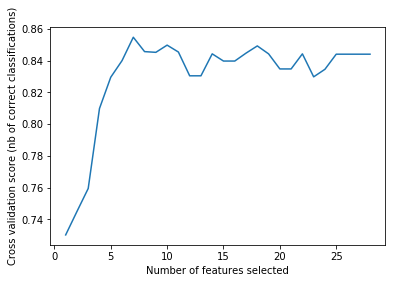

In [15]:
#model 
svc = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X_train_p, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)
print(rfecv.ranking_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


Indices of features contributing are 4,7,9,16,19,21,27
which are 6 initial variables : OLD PEAK , CP , EXCHANG, SLOPE , CA , THAL 

# Feature selection-Univariate selection 

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
test = SelectKBest(score_func=f_classif, k=9) # print 9 best features 
fit = test.fit(X_train_p, y_train)
# summarize scores
np.set_printoptions(precision=2)
print("scores_:",fit.scores_)
print("pvalues_:",fit.pvalues_)
print("selected index:",fit.get_support(True))

scores_: [  1.40e+01   4.55e+00   3.73e+00   5.22e+01   5.06e+01   9.53e+00
   9.53e+00   1.28e+00   1.37e+01   2.08e+01   6.91e+01   3.06e-02
   3.06e-02   2.06e+00   1.50e+00   1.22e+00   6.94e+01   6.94e+01
   5.24e+01   4.50e+01   4.90e-01   3.87e+01   3.91e+00   1.09e+01
   1.50e+01   7.71e+01   4.54e-01   7.07e+01]
pvalues_: [  2.39e-04   3.42e-02   5.47e-02   9.01e-12   1.76e-11   2.30e-03
   2.30e-03   2.59e-01   2.75e-04   8.57e-06   1.16e-14   8.61e-01
   8.61e-01   1.53e-01   2.22e-01   2.71e-01   1.03e-14   1.03e-14
   8.48e-12   1.78e-10   4.85e-01   2.68e-09   4.93e-02   1.13e-03
   1.47e-04   5.84e-16   5.01e-01   6.24e-15]
selected index: [ 3  4 10 16 17 18 19 25 27]


Indices of these values rank similar features with inclusion of THALACH: 
THALACH, OLD PEAK , CP , EXCHANG , SLOPE , THAL 

Therefore variables that will included in final model are: 
CP, EXCHAG , SLOPE , CA, THAL, OLD PEAK , THALACH - 7 variables 

will keep all dummy variables  for each category even if its indices individually been selected 

# new X_train_p_s and X_test_p_s
X train features now preprocessed and scaled 

In [17]:
#so create dataset with reduced feature space 
selected_feature_indices = 3,4,7,8,9,10,16,17,18,19,20,21,22,23,23,25,26,27 #ofX_train_p

X_train_p_s = X_train_p[:,selected_feature_indices] #impliment on train

X_test_p_s = X_test_p[:,selected_feature_indices] #impliment on test to see if feautre selection accurately reflects
                                                    #test data feature selection





# PCA on PS training set (X_train_p_s)
(with selection and preprocessing (features n = 18)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca_xps = pca.fit_transform(X_train_p_s)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([ 0.38,  0.53,  0.63,  0.7 ,  0.76,  0.82,  0.87,  0.91,  0.94,
        0.96,  0.98,  0.99,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ])

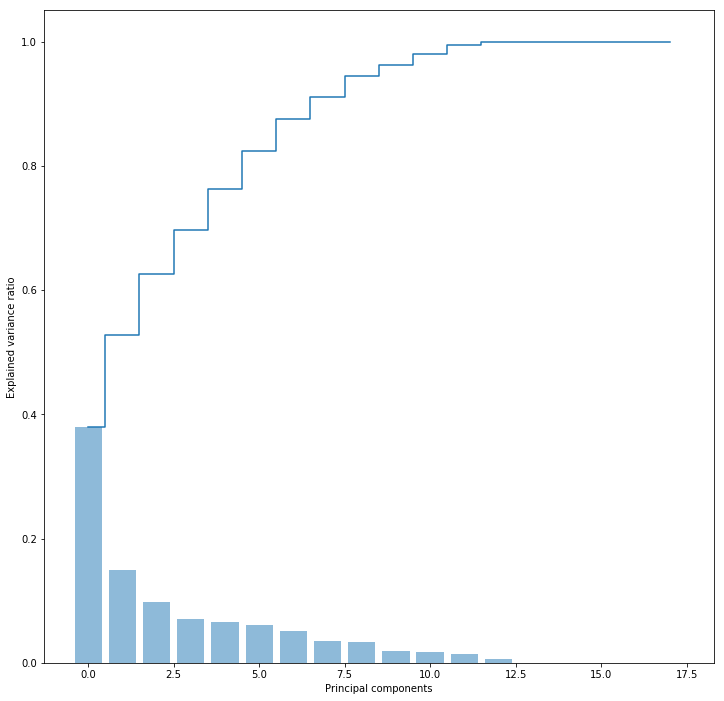

In [19]:
plt.figure(figsize=(12,12))
plt.bar(np.arange(18), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(18), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [20]:
#reduce dimension to 8 components 

# Create a pca object with the 8 components as a parameter
pca = PCA(n_components=8)

# Fit the PCA and transform the data
X_train_p_s_pca = pca.fit_transform(X_train_p_s)

# PCA on PO dataset (X_train_p)
(features = 28)

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
pca_xp = pca.fit_transform(X_train_p)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([ 0.24,  0.38,  0.48,  0.58,  0.64,  0.7 ,  0.75,  0.79,  0.83,
        0.86,  0.89,  0.91,  0.93,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ])

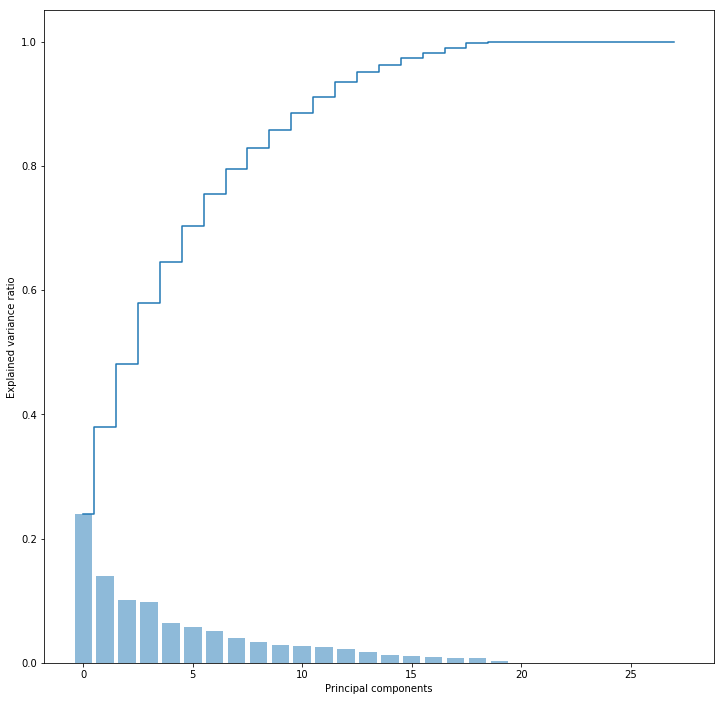

In [22]:
plt.figure(figsize=(12,12))
plt.bar(np.arange(28), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(28), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [23]:
#reduce dimension to 12 components 

# Create a pca object with the 12 components as a parameter
pca = PCA(n_components=12)

# Fit the PCA and transform the data
X_train_p_pca = pca.fit_transform(X_train_p)

# All variations of X training and test set 

# y sets 

y_train = train.iloc[:,-1]

y_test = test.iloc[:,-1]

# U - unprocessed 

X_train, X_test  <---------------all 13 features NO preprocessing

# PO - preprocesss only  
 
X_train_p, X_test_p <--------------all 13 original features rescaled see Feature preprocessing

# PS - preprocessing and selection (only on training data)

X_train_p_s  <----------- only on training data, rescaled feautres include 7 original features

X_test_p_S <---------- rescaled to the same 7 feautres but not been selected on, will see if selection on training reflects test


# PO + PCA (only on training data)

X_train_p_pca <------------- reduce 28 to 12 features NO SELECTION 

# PS + PCA (only on training data)

X_train_p_s_pca <------------- reduce 18 to 8 features 

# Unadjusted classifier performance on U training data (X_train)

In [24]:
from sklearn.dummy import DummyClassifier # for comparison 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

models = []
models.append(('SVM', SVC()))
models.append(('Dummy', DummyClassifier(strategy='most_frequent')))
models.append(('KNN', KNeighborsClassifier()))


#for cross validation 10 fold 
num_folds = 10

num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
results = []
names = []
msg =str()

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=num_folds)
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

    
print ('\n\n***results***')
print (msg)
print( num_folds, '-Fold cross-validation accuracy score for the training data unscaled')



***results***
SVM: 0.552013 (0.009905)
Dummy: 0.552013 (0.009905)
KNN: 0.640606 (0.084032)

10 -Fold cross-validation accuracy score for the training data unscaled


C:\Users\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# On  PO (X_train_p)
on preprocessed data 

In [25]:

num_instances = len(X_train_p)
seed = 7
scoring = 'accuracy'
results = []
names = []
msg =str()

for name, model in models:
    cv_results = cross_val_score(model, X_train_p, y_train, cv=num_folds)
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

    
print ('\n\n***results***')
print (msg)
print( num_folds, '-Fold cross-validation accuracy score for the training data unscaled')



***results***
SVM: 0.839848 (0.058190)
Dummy: 0.552013 (0.009905)
KNN: 0.812597 (0.078042)

10 -Fold cross-validation accuracy score for the training data unscaled


# On PS (X_train_p_s)

In [1]:


num_instances = len(X_train_p_s)                                                               
seed = 7
scoring = 'accuracy'
results = []
names = []
msg =str()

for name, model in models:
    cv_results = cross_val_score(model, X_train_p_s, y_train, cv=num_folds)
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

    
print ('\n\n***results***')
print (msg)
print( num_folds, '-Fold cross-validation accuracy score for the training data unscaled')

NameError: name 'X_train_p_s' is not defined

# Support Vector Machine (SVM)  

Learning on X_train_p_s ansd X_test_p_s # as pca done in pipeline 

In [25]:
#pipeline - data is going into pipeline prescaled but not PCA

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.pipeline import Pipeline


#evaluation metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

num_folds = 10

#SVM pipeline
pipe_svc = Pipeline([('pca', PCA(n_components=8)),('clf', SVC(probability =True, verbose=False))])

#fit pipeline to scaled training data
pipe_svc.fit(X_train_p_s, y_train)

scores = cross_val_score(estimator=pipe_svc, X=X_train_p_s, y=y_train, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune hyperparameters 
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,
                      scoring='accuracy',cv=num_folds,
                      n_jobs=1)

gs_svc = gs_svc.fit(X_train_p_s, y_train)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)




--> Model Training Accuracy: 0.859 +/- 0.074
--> Tuned Parameters Best Score:  0.867924528302
--> Best Parameters: 
 {'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


# SVM model - evaluation 

In [26]:
#using best parameters 
clf_svc = gs_svc.best_estimator_

#final scores training 
clf_svc.fit(X_train_p_s, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train_p_s,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)




print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Accuracy on Test set: %.5f' % clf_svc.score(X_test_p_s, y_test))

# futher evaluation metrics 

clf_svc.fit(X_train_p_s, y_train)
y_pred = clf_svc.predict(X_test_p_s)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


--> Model Training Accuracy: 0.868 +/- 0.054
--> Accuracy on Test set: 0.80220
0.802197802198
[[43  4]
 [14 30]]
             precision    recall  f1-score   support

        0.0       0.75      0.91      0.83        47
        1.0       0.88      0.68      0.77        44

avg / total       0.82      0.80      0.80        91



#  SVM Confusion matrix 

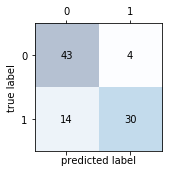

In [93]:
from sklearn.metrics import confusion_matrix
clf_svc.fit(X_train_p_s, y_train)
y_pred = clf_svc.predict(X_test_p_s)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# figure
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

# Learning curve for SVM 

In [101]:
# learning plot 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   

    
    from sklearn.model_selection import learning_curve
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Python\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

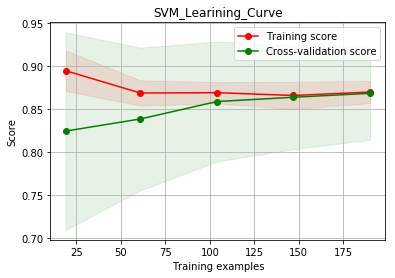

In [115]:
#svm learning curve 
plot_learning_curve(clf_svc,'SVM_Learining_Curve', X_train_p_s, y_train, ylim=None, cv=num_folds, scoring='accuracy', obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

# effect of SVM gamma hyperparameter on variance 

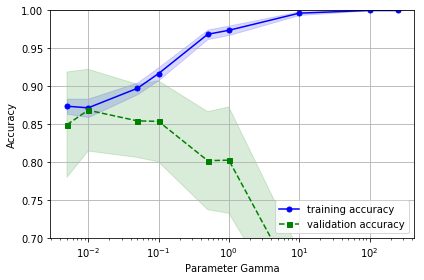

In [90]:
# Finding validation accuracy maximum                                                       

from sklearn.learning_curve import validation_curve

param_range = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 100.0, 250.0]
train_scores, test_scores = validation_curve(
                estimator=clf_svc, 
                X=X_train_p_s, 
                y=y_train, 
                param_name='clf__gamma', 
                param_range=param_range,
                cv=num_folds)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter Gamma')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.tight_layout()
plt.show()

# Grid search with greater gamma range 

above shows its around 0.01

In [42]:
from sklearn.metrics import make_scorer, f1_score

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.02, 0.095, 0.009, 0.03, 0.005, 0.1, 0.15, 10, 11, 20, 5]

param_grid = [{'clf__C': c_gamma_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': c_gamma_range, 
                  'clf__gamma': c_gamma_range, 
                  'clf__kernel': ['rbf'],}]

gs = GridSearchCV(estimator=pipe_svc, 
                                param_grid=param_grid, 
                                scoring=scorer, 
                                cv=num_folds)
gs = gs.fit(X_train_p_s, y_train)
print(gs.best_score_)
print(gs.best_params_)

#provides same results 

0.882338985871
{'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


# K-Nearest Neighbour 
on X_train_p_s

In [49]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
                     ('pca', PCA(n_components=8)),
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train_p_s, y_train) 

scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train_p_s, 
                         y=y_train, 
                         cv=num_folds,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune k 

param_range = range(1, 50)
param_grid = [{'clf__n_neighbors': param_range}]


# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=num_folds, 
                    scoring='accuracy')
gs_knn = grid.fit(X_train_p_s, y_train)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)



--> Model Training Accuracy: 0.825 +/- 0.079
--> Tuned Parameters Best Score:  0.858490566038
--> Best Parameters: 
 {'clf__n_neighbors': 29}


# evaluation with just K tuned

In [51]:
#evalulate 

clf_knn = gs_knn.best_estimator_

#final scores training 
clf_knn.fit(X_train_p_s, y_train)
scores = cross_val_score(estimator=clf_knn,
                         X=X_train_p_s,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)




print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Final Accuracy on Test set: %.5f' % clf_knn.score(X_test_p_s, y_test))

# futher evaluation metrics 

clf_knn.fit(X_train_p_s, y_train)
y_pred = clf_knn.predict(X_test_p_s)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

--> Final Model Training Accuracy: 0.859 +/- 0.102
--> Final Accuracy on Test set: 0.79121
0.791208791209
[[44  3]
 [16 28]]
             precision    recall  f1-score   support

        0.0       0.73      0.94      0.82        47
        1.0       0.90      0.64      0.75        44

avg / total       0.82      0.79      0.79        91



# prediction accuracy vs number of neighbours

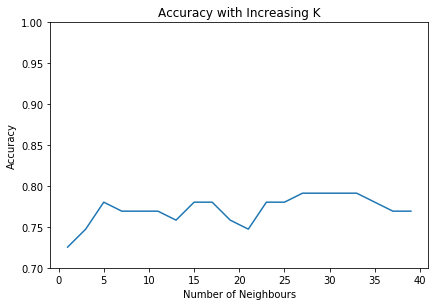

In [54]:
from sklearn import neighbors

def plotvector(Xtrain, ytrain, Xtest, ytest, weights):
    results = []
    
    #Xtrain = XTrain[:, :2]
    
    for n in range(1, 40, 2):
        pipe_knn = Pipeline([
                     ('pca', PCA(n_components=8)),
                     ('clf', KNeighborsClassifier(n))])
        pipe_knn.fit(Xtrain, ytrain)
        preds = pipe_knn.predict(Xtest)
        accuracy = pipe_knn.score(Xtest, ytest)
        results.append([n, accuracy])
 
    results = np.array(results)
    return(results)

pltvector1 = plotvector(X_train_p_s, y_train, X_test_p_s, y_test, weights="uniform")

line1 = plt.plot(pltvector1[:,0], pltvector1[:,1])


plt.legend(loc=3)
plt.ylim(0.7, 1)
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbours')
plt.title("Accuracy with Increasing K")
plt.show()

#is the best K parameter to have the highest accuracy

# KNN Confusion matrix 

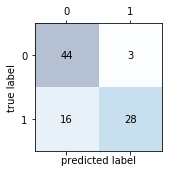

In [55]:
clf_knn.fit(X_train_p_s, y_train)
y_pred = clf_knn.predict(X_test_p_s)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# figure
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

# learning curve for KNN 

<module 'matplotlib.pyplot' from 'C:\\Users\\Python\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

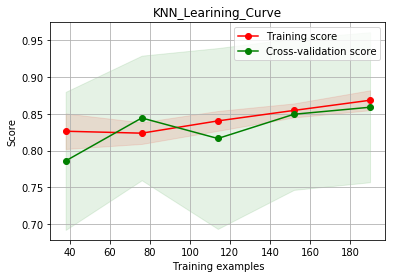

In [118]:
plot_learning_curve(clf_knn,'KNN_Learining_Curve', X_train_p_s, y_train, ylim=None, cv=num_folds, scoring='accuracy', obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.2, 1.0, 5))

# Extra KNN hyperparameter tuning 

including p, weight

In [70]:
# Tune hyperparameters 

#don't work efficiently if use pipeline with PCA, instead use already PCA X_train

model = KNeighborsClassifier()

#Hyper Parameters Set
param_range = range(1, 40)
pmetric = range(1,4)
params = {'n_neighbors':param_range,
          'weights':['uniform', 'distance'],
         'p': pmetric}

#Making models with hyper parameters sets
gridknn = GridSearchCV(model, param_grid=params, cv=3, 
                    scoring='accuracy')
#Learning
gridknn.fit(X_train_p_s_pca,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",gridknn.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'n_neighbors': 10, 'p': 3, 'weights': 'uniform'}


# evaluation of extra KNN hypertuning 

In [71]:
#K_NN final model evaluation 
pipe_knn = Pipeline([
                     ('pca', PCA(n_components=8)),
                     ('clf', KNeighborsClassifier(algorithm='auto', n_neighbors= 10, p= 3, weights= 'uniform' ))])

#Get Final Scores
pipe_knn.fit(X_train_p_s, y_train)
scores = cross_val_score(estimator=pipe_knn,
                         X=X_train_p_s,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % pipe_knn.score(X_test_p_s,y_test))

pipe_knn.fit(X_train_p_s, y_train)
y_pred = pipe_knn.predict(X_test_p_s)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

--> Final Model Training Accuracy: 0.840 +/- 0.062
--> Final Accuracy on Test set: 0.79121
0.791208791209
[[43  4]
 [15 29]]
             precision    recall  f1-score   support

        0.0       0.74      0.91      0.82        47
        1.0       0.88      0.66      0.75        44

avg / total       0.81      0.79      0.79        91



# KNN (extra hypertuning) Confusion matrix 

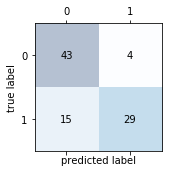

In [73]:
pipe_knn.fit(X_train_p_s, y_train)
y_pred = pipe_knn.predict(X_test_p_s)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# figure
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

# ROC curve 

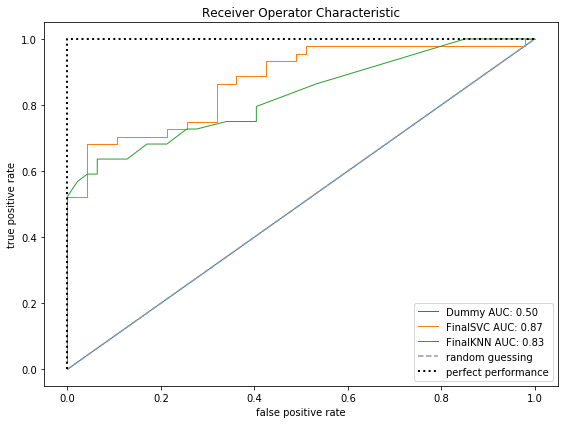

In [143]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, model in pipelines:
      
    model.fit(X_train_p_s, y_train)
    
    probas = model.predict_proba(X_test_p_s)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Sensitivity analysis

# KNN 

In [33]:
#Default KNN  PS dataset 

pipe_knn = Pipeline([
                     ('pca', PCA(n_components=8)),
                     ('clf', KNeighborsClassifier())])

pipe_knn.fit(X_train_p_s, y_train)
scores = cross_val_score(estimator=pipe_knn,
                         X=X_train_p_s,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % pipe_knn.score(X_test_p_s,y_test))

pipe_knn.fit(X_train_p_s, y_train)
y_pred = pipe_knn.predict(X_test_p_s)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

--> Final Model Training Accuracy: 0.825 +/- 0.079
--> Final Accuracy on Test set: 0.78022
0.78021978022
[[40  7]
 [13 31]]
             precision    recall  f1-score   support

        0.0       0.75      0.85      0.80        47
        1.0       0.82      0.70      0.76        44

avg / total       0.78      0.78      0.78        91



In [34]:
#optimal KNN, PO dataset 

pipe_knn = Pipeline([
                     ('pca', PCA(n_components=12)),
                     ('clf', KNeighborsClassifier())])

pipe_knn.fit(X_train_p, y_train)
scores = cross_val_score(estimator=pipe_knn,
                         X=X_train_p,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % pipe_knn.score(X_test_p,y_test))

pipe_knn.fit(X_train_p, y_train)
y_pred = pipe_knn.predict(X_test_p)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

--> Final Model Training Accuracy: 0.813 +/- 0.089
--> Final Accuracy on Test set: 0.74725
0.747252747253
[[41  6]
 [17 27]]
             precision    recall  f1-score   support

        0.0       0.71      0.87      0.78        47
        1.0       0.82      0.61      0.70        44

avg / total       0.76      0.75      0.74        91



In [123]:
#optimal KNN, U dataset 

pipe_knn = Pipeline([
                     ('clf', KNeighborsClassifier(n_neighbors=29))])

pipe_knn.fit(X_train, y_train)
scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % pipe_knn.score(X_test,y_test))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

--> Final Model Training Accuracy: 0.632 +/- 0.106
--> Final Accuracy on Test set: 0.63736
0.637362637363
[[35 12]
 [21 23]]
             precision    recall  f1-score   support

        0.0       0.62      0.74      0.68        47
        1.0       0.66      0.52      0.58        44

avg / total       0.64      0.64      0.63        91



# SVM 

In [39]:
#using default parameters, on PS dataset 

pipe_svc = Pipeline([('pca', PCA(n_components=8)),('clf', SVC(probability =True, verbose=False))])

#final scores training 
pipe_svc.fit(X_train_p_s, y_train)
scores = cross_val_score(estimator=pipe_svc,
                         X=X_train_p_s,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)




print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Accuracy on Test set: %.5f' % pipe_svc.score(X_test_p_s, y_test))

# futher evaluation metrics 

pipe_svc.fit(X_train_p_s, y_train)
y_pred = pipe_svc.predict(X_test_p_s)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


--> Model Training Accuracy: 0.859 +/- 0.074
--> Accuracy on Test set: 0.76923
0.769230769231
[[39  8]
 [13 31]]
             precision    recall  f1-score   support

        0.0       0.75      0.83      0.79        47
        1.0       0.79      0.70      0.75        44

avg / total       0.77      0.77      0.77        91



In [41]:
#dataset PO, optimal parameters 
pipe_svc = Pipeline([('clf', SVC(C =10, gamma= 0.01, kernel= 'rbf'))])

#final scores training 
pipe_svc.fit(X_train_p, y_train)
scores = cross_val_score(estimator=pipe_svc,
                         X=X_train_p,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)




print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Accuracy on Test set: %.5f' % pipe_svc.score(X_test_p, y_test))

# futher evaluation metrics 

pipe_svc.fit(X_train_p, y_train)
y_pred = pipe_svc.predict(X_test_p)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



--> Model Training Accuracy: 0.845 +/- 0.045
--> Accuracy on Test set: 0.76923
0.769230769231
[[40  7]
 [14 30]]
             precision    recall  f1-score   support

        0.0       0.74      0.85      0.79        47
        1.0       0.81      0.68      0.74        44

avg / total       0.77      0.77      0.77        91



In [40]:
#dataset U, optimal parameters 
pipe_svc = Pipeline([('clf', SVC(C =10, gamma= 0.01, kernel= 'rbf'))])

#final scores training 
pipe_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=pipe_svc,
                         X=X_train,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)




print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Accuracy on Test set: %.5f' % pipe_svc.score(X_test, y_test))

# futher evaluation metrics 

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


--> Model Training Accuracy: 0.548 +/- 0.084
--> Accuracy on Test set: 0.60440
0.604395604396
[[36 11]
 [25 19]]
             precision    recall  f1-score   support

        0.0       0.59      0.77      0.67        47
        1.0       0.63      0.43      0.51        44

avg / total       0.61      0.60      0.59        91



# Dummy classifier 
on PS dataset 

In [138]:
from sklearn.dummy import DummyClassifier # for comparison 
from sklearn.cross_validation import cross_val_score

models = []

models.append(('Dummy', DummyClassifier(strategy='most_frequent')))



#for cross validation 10 fold 
num_folds = 10

num_instances = len(X_train_p_s)
seed = 7
scoring = 'accuracy'
results = []
names = []
msg =str()

for name, model in models:
    cv_results = cross_val_score(model, X_train_p_s, y_train, cv=num_folds)
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

    



# futher evaluation metrics 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.516483516484
[[47  0]
 [44  0]]
             precision    recall  f1-score   support

        0.0       0.52      1.00      0.68        47
        1.0       0.00      0.00      0.00        44

avg / total       0.27      0.52      0.35        91



C:\Users\Python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
